In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df=pd.read_csv("C:/Users/hands/Downloads/Diwali Sales Data.csv",encoding='latin1')

In [61]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age-Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [62]:
df.shape

(11251, 13)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age-Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [64]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis-EDA

In [65]:
## Here we will check the percentage of nan values present in each feature

## 1 -step make the list of features which has missing values
features_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Amount 0.0011  % missing values


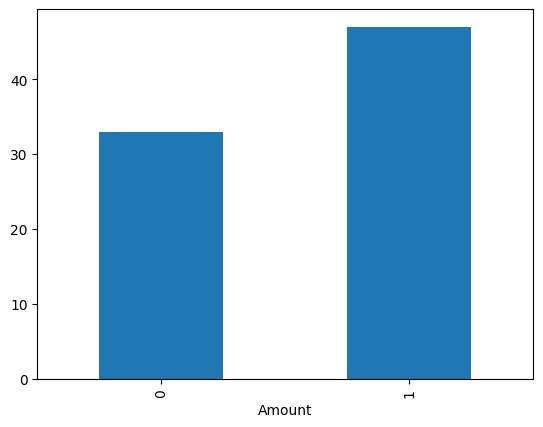

In [66]:
for feature in features_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the median Age where the information is missing or present
    data.groupby(feature)['Age'].median().plot.bar()

# Numerical Variables

In [67]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  5


,User_ID,Age,Marital_Status,Orders,Amount
0,1002903,28,0,1,23952.0
1,1000732,35,1,3,23934.0
2,1001990,35,1,3,23924.0
3,1001425,16,0,2,23912.0
4,1000588,28,1,2,23877.0


In [76]:
# list of variables that contain Age and martial_status
age_feature = [feature for feature in numerical_features if 'Age' in feature or 'Mar' in feature]

age_feature

['Age', 'Marital_Status']

In [78]:
for feature in age_feature:
    print(feature, df[feature].unique())

Age [28 35 16 25 61 26 34 20 46 24 48 29 54 19 30 53 83 33 40 39 32 36 55 27
 72 45 43 47 22 52 18 21 38 37 23 49 42 50 31 44 41 66 15 51 77 87 79 71
 88 58 82 62 92 12 63 17 13 67 90 56 75 81 64 73 84 14 76 86 89 68 91 85
 70 80 65 74 69 78 57 60 59]
Marital_Status [0 1]


In [79]:
age_feature

['Age', 'Marital_Status']

<AxesSubplot: xlabel='Age'>

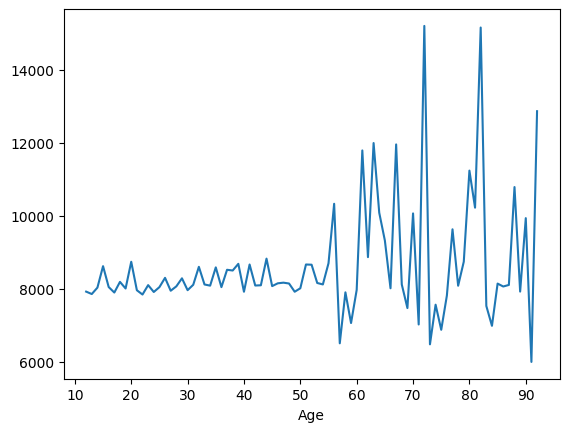

In [81]:
## Lets analyze the Temporal age Variables
## We will check whether there is a relation between Age and the Amount

df.groupby('Age')['Amount'].median().plot()

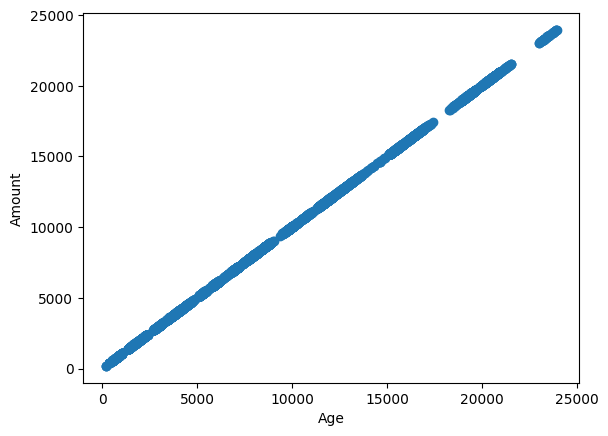

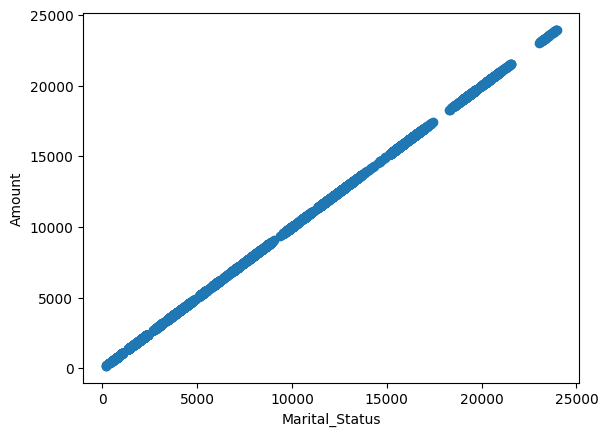

In [83]:
## Here we will compare the difference between Age with Amount

for feature in age_feature:
    if feature!='Amount':
        data=df.copy()
        ## We will capture the difference between movement variable and popularity
        data[feature]=data['Amount']-data[feature]

        plt.scatter(data[feature],data['Amount'])
        plt.xlabel(feature)
        plt.ylabel('Amount')
        plt.show()

# Discrete Variables

In [85]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in age_feature+['User_id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [86]:
discrete_feature

['Orders']

In [87]:
df[discrete_feature].head()

,Orders
0,1
1,3
2,3
3,2
4,2


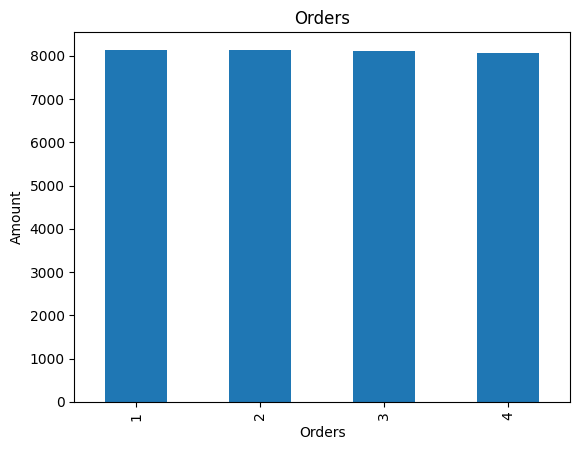

In [90]:
## Lets Find the realtionship between Orders and Amount

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['Amount'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Amount')
    plt.title(feature)
    plt.show()

# Continous Variables

In [91]:
continous_feature=[feature for feature in numerical_features if feature not in discrete_feature+age_feature+['User_id']]
print("continous Variables Count: {}".format(len(continous_feature)))

continous Variables Count: 2


In [92]:
continous_feature

['User_ID', 'Amount']

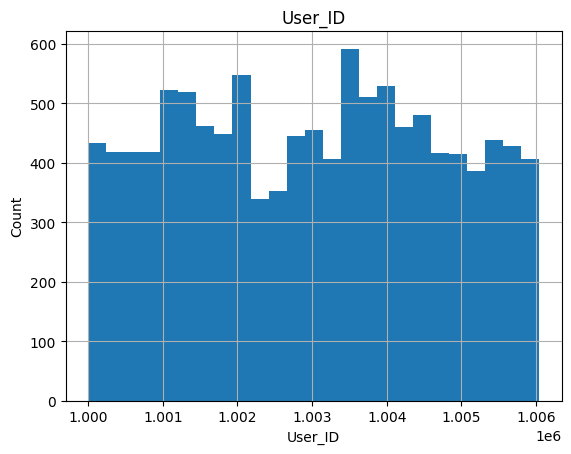

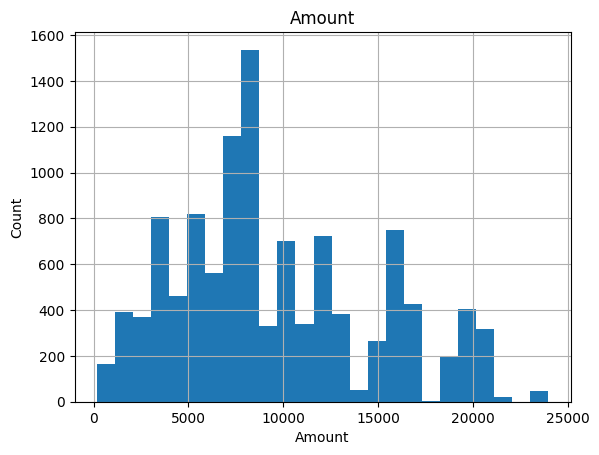

In [93]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continous_feature :
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

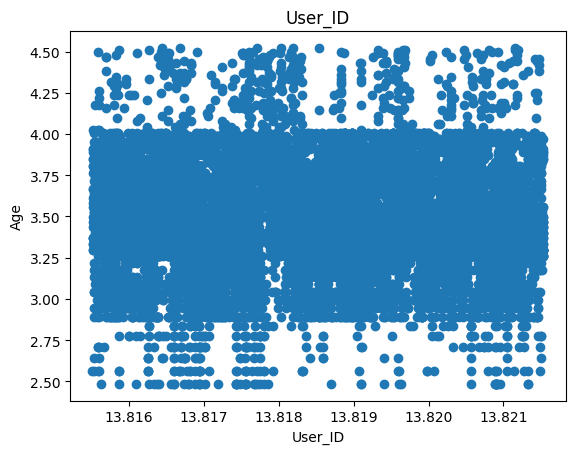

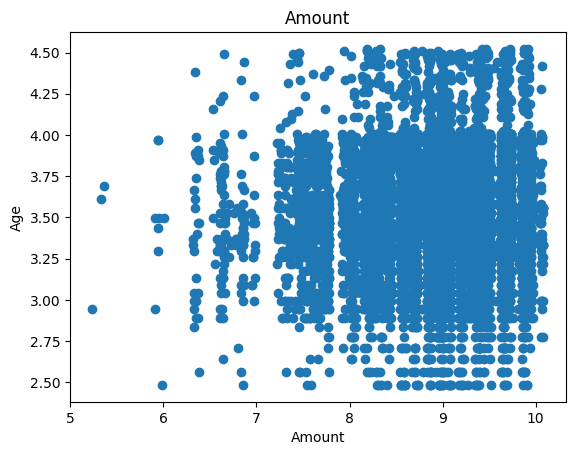

In [94]:
## We will be using logarithmic transformation


for feature in continous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Age']=np.log(data['Age'])
        plt.scatter(data[feature],data['Age'])
        plt.xlabel(feature)
        plt.ylabel('Age')
        plt.title(feature)
        plt.show()

# Outliers

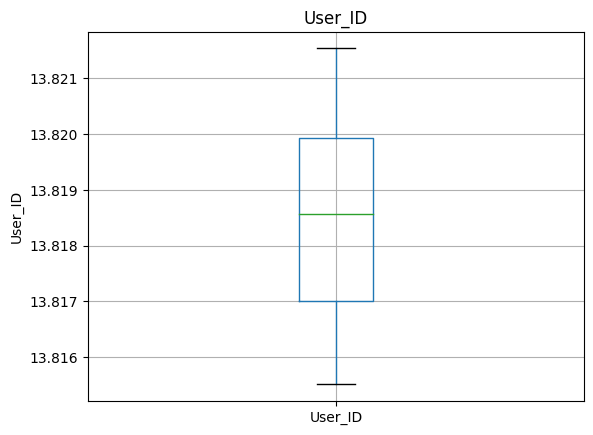

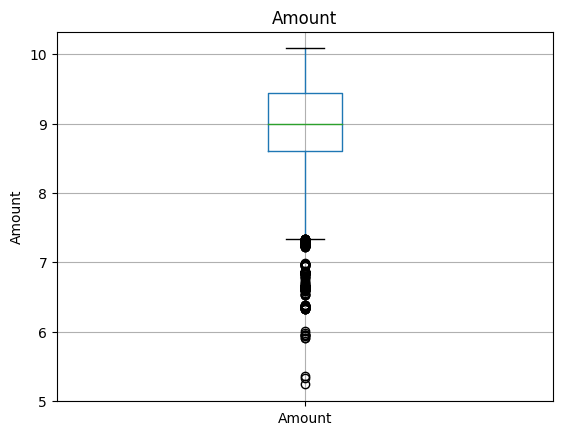

In [95]:
for feature in continous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Categorical Variables

In [96]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['Cust_name',
 'Product_ID',
 'Gender',
 'Age-Group',
 'State',
 'Zone',
 'Occupation',
 'Product_Category']

In [97]:
df[categorical_features].head()

,Cust_name,Product_ID,Gender,Age-Group,State,Zone,Occupation,Product_Category
0,Sanskriti,P00125942,F,26-35,Maharashtra,Western,Healthcare,Auto
1,Kartik,P00110942,F,26-35,Andhra Pradesh,Southern,Govt,Auto
2,Bindu,P00118542,F,26-35,Uttar Pradesh,Central,Automobile,Auto
3,Sudevi,P00237842,M,0-17,Karnataka,Southern,Construction,Auto
4,Joni,P00057942,M,26-35,Gujarat,Western,Food Processing,Auto


In [98]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Cust_name and number of categories are 1250
The feature is Product_ID and number of categories are 2351
The feature is Gender and number of categories are 2
The feature is Age-Group and number of categories are 7
The feature is State and number of categories are 16
The feature is Zone and number of categories are 5
The feature is Occupation and number of categories are 15
The feature is Product_Category and number of categories are 18


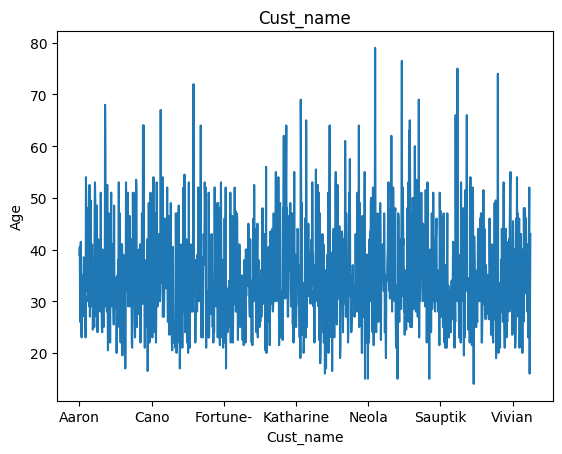

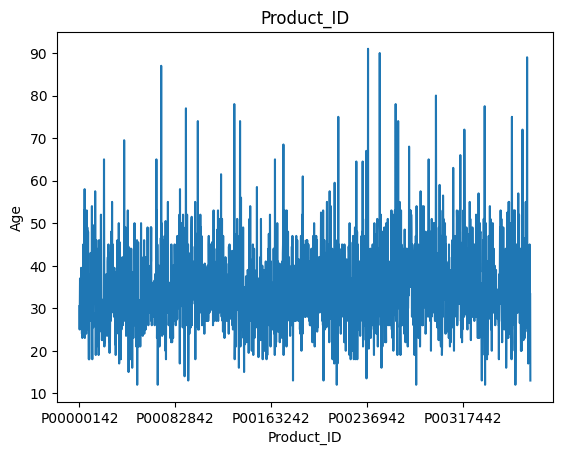

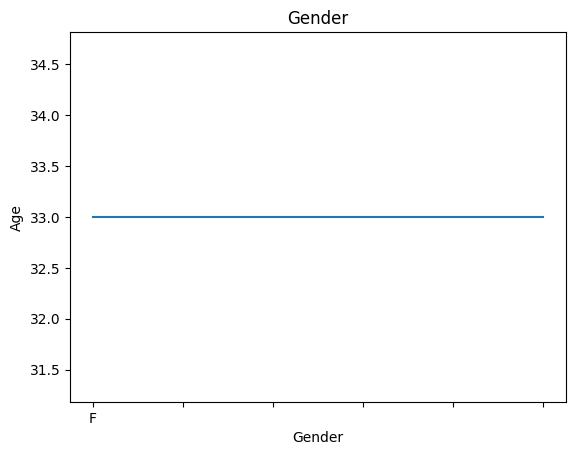

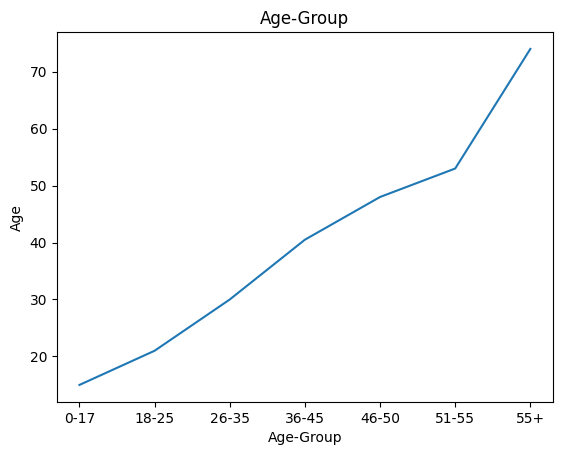

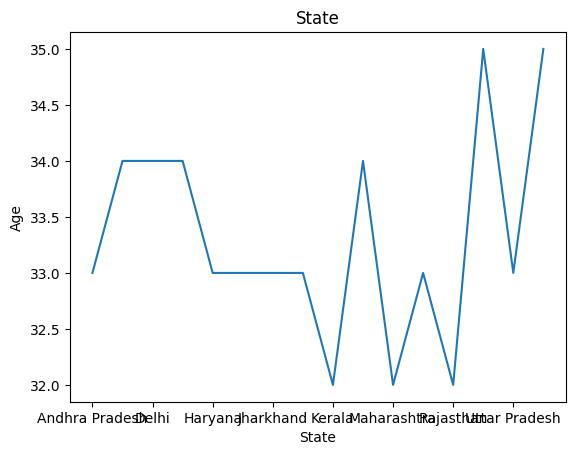

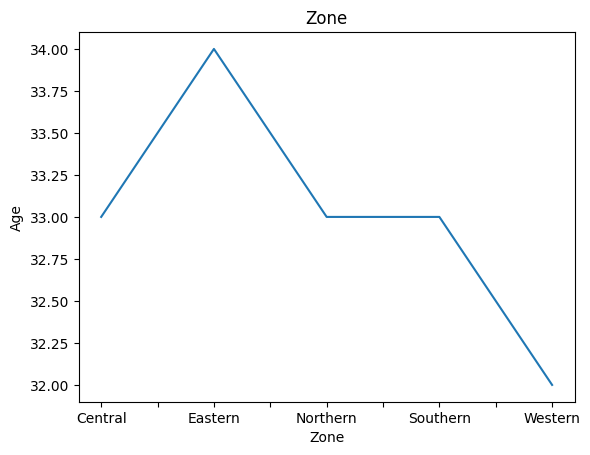

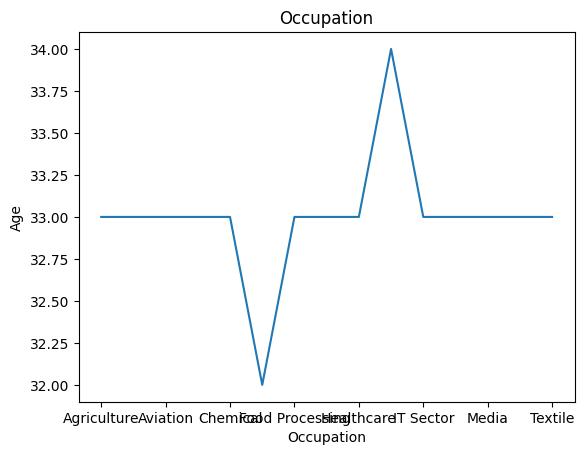

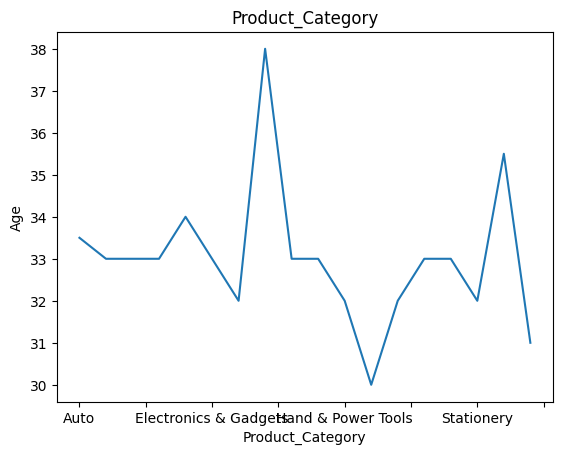

In [99]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['Age'].median().plot.line()
    plt.xlabel(feature)
    plt.ylabel('Age')
    plt.title(feature)
    plt.show()

In [100]:
df.head(50)

,User_ID,Cust_name,Product_ID,Gender,Age-Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99
